<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/20220603_DA11_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movielens 데이터 분석

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋 준비

In [ ]:
# 데이터 파일이 저장된 경로
movie_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'
rating_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'
users_dat = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/users.dat'

In [ ]:
# DataFrame을 만들 때 사용할 컬럼 이름들
movies_cols = ['movie_id', 'title', 'genres']
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
users_cols = ['user_id', 'gender', 'age', 'occupation', 'zip_code']

In [ ]:
movies = pd.read_csv(movie_dat, sep='::', engine='python', names=movies_cols)

In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv(rating_dat, sep='::', engine='python', names=ratings_cols)

In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users = pd.read_csv(users_dat, sep='::', engine='python', names=users_cols)

In [ ]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


*  ratings와 movies를 합침(merge).
*  위 결과와 users를 합침(merge).

In [ ]:
df = pd.merge(ratings, movies, how='inner', on='movie_id')
df

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [ ]:
df2 = pd.merge(users, df, how='inner', on='user_id')
df2

,user_id,gender,age,occupation,zip_code,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1150,5,956715569,"Return of Martin Guerre, The (Retour de Martin...",Drama
1000205,6040,M,25,6,11106,2751,1,956716438,From the Hip (1987),Comedy
1000206,6040,M,25,6,11106,3289,5,956704305,Not One Less (Yi ge dou bu neng shao) (1999),Drama
1000207,6040,M,25,6,11106,722,3,960971992,"Haunted World of Edward D. Wood Jr., The (1995)",Documentary


# 데이터 탐색

*  rating 빈도수
*  gender 빈도수
*  occupation 빈도수

In [ ]:
df2['rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

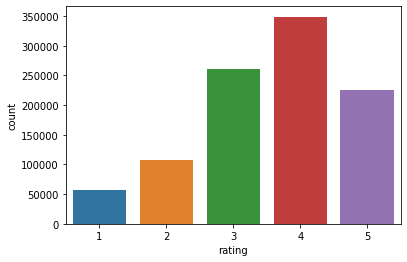

In [ ]:
sns.countplot(x='rating', data=df2)
plt.show()

In [ ]:
df2['gender'].value_counts()

M    753769
F    246440
Name: gender, dtype: int64

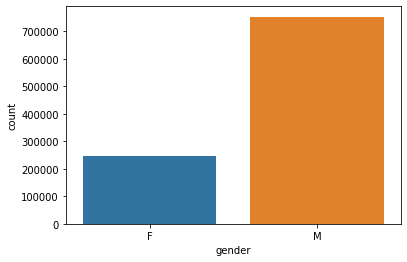

In [ ]:
sns.countplot(x='gender', data=df2)
plt.show()

In [ ]:
df2['occupation'].value_counts().sort_values(ascending=False)

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: occupation, dtype: int64

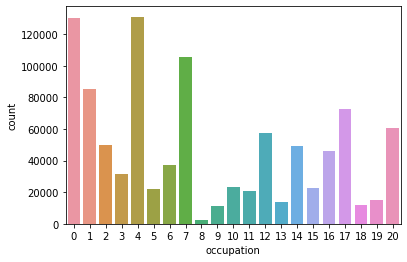

In [ ]:
sns.countplot(x='occupation', data=df2)
plt.show()

# 데이터 분석

## 영화별 별점 평균 상위 10개, 하위 10개

In [ ]:
by_title = df2.groupby('title')['rating'].mean()
by_title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
# 별점 평균 상위 10개
by_title.sort_values(ascending=False).head(10)

title
Ulysses (Ulisse) (1954)                      5.0
Lured (1947)                                 5.0
Follow the Bitch (1998)                      5.0
Bittersweet Motel (2000)                     5.0
Song of Freedom (1936)                       5.0
One Little Indian (1973)                     5.0
Smashing Time (1967)                         5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Gate of Heavenly Peace, The (1995)           5.0
Baby, The (1973)                             5.0
Name: rating, dtype: float64

In [ ]:
# 별점 평균 하위 10개
by_title.sort_values(ascending=True).head(10)

title
Elstree Calling (1930)                                        1.0
Get Over It (1996)                                            1.0
Venice/Venice (1992)                                          1.0
Windows (1980)                                                1.0
Kestrel's Eye (Falkens öga) (1998)                            1.0
McCullochs, The (1975)                                        1.0
Sleepover (1995)                                              1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)                   1.0
Santa with Muscles (1996)                                     1.0
Name: rating, dtype: float64

In [ ]:
# 영화별 빈도수, 별점 평균
by_title = df2.groupby('title')['rating'].agg(['count', 'mean'])
by_title

,count,mean
title,,
"$1,000,000 Duck (1971)",37,3.027027
'Night Mother (1986),70,3.371429
'Til There Was You (1997),52,2.692308
"'burbs, The (1989)",303,2.910891
...And Justice for All (1979),199,3.713568
...,...,...
"Zed & Two Noughts, A (1985)",29,3.413793
Zero Effect (1998),301,3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),2,3.500000


In [ ]:
by_title.sort_values(by='mean', ascending=False)

,count,mean
title,,
Ulysses (Ulisse) (1954),1,5.0
Lured (1947),1,5.0
Follow the Bitch (1998),1,5.0
Bittersweet Motel (2000),1,5.0
Song of Freedom (1936),1,5.0
...,...,...
"Fantastic Night, The (La Nuit Fantastique) (1949)",1,1.0
Cheetah (1989),1,1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973),2,1.0


리뷰 건수가 1~2개 밖에 없는 영화들의 별점 평균을 계산하는 것은 큰 의미가 없을 것 같다.

일정 숫자 이상의 리뷰 건수가 있는 영화들을 선택해서 별점 분석을 하는 것이 더 의미가 있을 것 같다.

In [ ]:
title_counts = df2['title'].value_counts()
title_counts

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Blood and Sand (Sangre y Arena) (1989)                      1
Ring, The (1927)                                            1
Eden (1997)                                                 1
Frank and Ollie (1995)                                      1
Five Wives, Three Secretaries and Me (1998)                 1
Name: title, Length: 3706, dtype: int64

In [ ]:
title_counts.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: title, dtype: float64

리뷰 횟수(제목 등장 횟수)가 150번 이상인 영화들을 선택해서 분석

In [ ]:
# 150번 이상 등장하는 영화 제목들
indexer = title_counts[title_counts >= 150].index
indexer

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Nixon (1995)', 'Twelfth Night (1996)', 'Cowboy Way, The (1994)',
       'Program, The (1993)', 'In the Army Now (1994)',
       'Tales from the Crypt Presents: Bordello of Blood (1996)',
       'Asphalt Jungle, The (1950)', 'Love and Death on Long Island (1997)',
       'Golden Voyage of Sinbad, The (1974)',
       'Police Academy 5: Assignment: Miami Beach (1988)'],
      dtype='object', length=1683)

In [ ]:
by_title = df2.groupby('title')['rating'].mean()
by_title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
# 150번 이상 나오는 영화 제목들 중 별점 평균 상위 10개
by_title.loc[indexer].sort_values(ascending=False).head(10)

Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: rating, dtype: float64

In [ ]:
# 150번 이상 나오는 영화 제목들 중 별점 평균 하위 10개
by_title.loc[indexer].sort_values(ascending=True).head(10)

Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: rating, dtype: float64

## 성별에 따른 별점 평균

In [ ]:
df2.groupby(['title', 'gender'])['rating'].mean()
# MultiIndex를 갖는 Series

title                                       gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                                        ...   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  M         3.500000
Zeus and Roxanne (1997)                     F         2.777778
                                            M         2.357143
eXistenZ (1999)                             F         3.098592
                                            M         3.289086
Name: rating, Length: 7152, dtype: float64

In [ ]:
by_gender = df2.groupby(['title', 'gender'])['rating'].mean().unstack()
# gender index가 컬럼으로 변환된 DataFrame
by_gender

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
df2.pivot_table(values='rating', index='title', columns='gender')
# pd.pivot_table 파라미터 :
#   values : 통계 함수를 적용할 컬럼.
#   index : 행(row) 인덱스로 사용할 (카테고리 타입) 변수(컬럼).
#   columns : 열(column) 인덱스로 사용할 (카테고리 타입) 변수(컬럼).
#   aggfunc : 변수(컬럼)에 적용할 통계 함수 이름. 기본값은 'mean'.

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
# 150회 이상 별점을 받은 영화들
by_gender_150 = by_gender.loc[indexer]
by_gender_150

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
Tales from the Crypt Presents: Bordello of Blood (1996),2.727273,2.565891
"Asphalt Jungle, The (1950)",3.571429,4.008130
Love and Death on Long Island (1997),3.116279,3.555556
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818


In [ ]:
# 150회 이상 별점을 받은 영화들 중에서 여성들의 별점 평균 상위 10개
by_gender_150.sort_values(by='F', ascending=False).head(10)

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [ ]:
# 150회 이상 별점을 받은 영화들 중에서 남성들의 별점 평균 상위 10개
by_gender_150.sort_values(by='M', ascending=False).head(10)

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


## 성별 평점 차이가 큰 영화

In [ ]:
# 성별 별점 평균이 계산된 데이터 프레임에 diff=(여성 별점 평균) - (남성 별점 평균) 파생 변수 추가
by_gender_150['diff'] = by_gender_150['F'] - by_gender_150['M']
by_gender_150

gender,F,M,diff
American Beauty (1999),4.238901,4.347301,-0.108400
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,-0.192371
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,-0.238096
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058,-0.203821
Jurassic Park (1993),3.579407,3.814197,-0.234791
...,...,...,...
Tales from the Crypt Presents: Bordello of Blood (1996),2.727273,2.565891,0.161381
"Asphalt Jungle, The (1950)",3.571429,4.008130,-0.436702
Love and Death on Long Island (1997),3.116279,3.555556,-0.439276
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818,-0.273923


In [ ]:
# 성별 별점 평균의 차이가 큰 영화 상위 10개 - 여성 평균이 더 높은 경우
by_gender_150.sort_values(by='diff', ascending=False).head(10)

gender,F,M,diff
Dirty Dancing (1987),3.790378,2.959596,0.830782
Home Alone 3 (1997),2.486486,1.683761,0.802726
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,0.691567
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,0.642857
Grease (1978),3.975265,3.367041,0.608224
Police Academy 4: Citizens on Patrol (1987),2.406250,1.802817,0.603433
Brokedown Palace (1999),3.312500,2.723577,0.588923
"Relic, The (1997)",3.309524,2.723077,0.586447
Angels in the Outfield (1994),3.162500,2.580838,0.581662


In [ ]:
# 성별 별점 평균의 차이가 큰 영화 상위 10개 - 남성 평균이 더 높은 경우
by_gender_150.sort_values(by='diff', ascending=True).head(10)

gender,F,M,diff
Lifeforce (1985),2.250000,2.994152,-0.744152
Quest for Fire (1981),2.578947,3.309677,-0.730730
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
No Escape (1994),2.300000,2.994048,-0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Tora! Tora! Tora! (1970),3.090909,3.737705,-0.646796
Up in Smoke (1978),2.944444,3.585227,-0.640783
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
Friday the 13th: The Final Chapter (1984),1.636364,2.258503,-0.622140
"Longest Day, The (1962)",3.411765,4.031447,-0.619682


In [ ]:
df2[df2['title'] == 'Dirty Dancing (1987)']

,user_id,gender,age,occupation,zip_code,movie_id,rating,timestamp,title,genres
512,6,F,50,9,55117,1088,5,978236670,Dirty Dancing (1987),Musical|Romance
934,10,F,35,1,95370,1088,5,978227300,Dirty Dancing (1987),Musical|Romance
3467,26,M,25,7,23112,1088,3,978271447,Dirty Dancing (1987),Musical|Romance
4242,32,F,25,0,19355,1088,4,978121564,Dirty Dancing (1987),Musical|Romance
4408,33,M,45,3,55421,1088,2,978110698,Dirty Dancing (1987),Musical|Romance
...,...,...,...,...,...,...,...,...,...,...
992382,5996,F,25,0,87114,1088,3,988051659,Dirty Dancing (1987),Musical|Romance
993172,6000,M,45,17,30075,1088,2,956884435,Dirty Dancing (1987),Musical|Romance
994718,6007,M,35,17,80537,1088,2,956789428,Dirty Dancing (1987),Musical|Romance
996122,6016,M,45,1,37209,1088,3,994455257,Dirty Dancing (1987),Musical|Romance


In [ ]:
df2[df2['title'] == 'Lifeforce (1985)']

,user_id,gender,age,occupation,zip_code,movie_id,rating,timestamp,title,genres
1918,17,M,50,1,95350,2377,5,978160993,Lifeforce (1985),Horror|Sci-Fi
7775,53,M,25,0,96931,2377,5,977976632,Lifeforce (1985),Horror|Sci-Fi
12426,94,M,25,17,28601,2377,5,977628669,Lifeforce (1985),Horror|Sci-Fi
28167,195,M,25,12,10458,2377,4,977551016,Lifeforce (1985),Horror|Sci-Fi
36499,245,M,35,16,66046,2377,2,976732787,Lifeforce (1985),Horror|Sci-Fi
...,...,...,...,...,...,...,...,...,...,...
983825,5947,F,45,16,97215,2377,1,957191007,Lifeforce (1985),Horror|Sci-Fi
985661,5954,M,45,11,70802,2377,3,957705481,Lifeforce (1985),Horror|Sci-Fi
994814,6007,M,35,17,80537,2377,4,956790437,Lifeforce (1985),Horror|Sci-Fi
998091,6030,M,25,17,32618,2377,3,956718653,Lifeforce (1985),Horror|Sci-Fi


### 여성들의 별점 평균 상위 100위까지 영화들의 장르 순서. 

In [ ]:
# 여성 별점 평균 상위 100개 영화의 제목 인덱스
F_100 = by_gender_150.sort_values(by='F', ascending=False).head(100).index
F_100

Index(['Close Shave, A (1995)', 'Wrong Trousers, The (1993)',
       'General, The (1927)', 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)',
       'Wallace & Gromit: The Best of Aardman Animation (1996)',
       'Schindler's List (1993)',
       'Grand Illusion (Grande illusion, La) (1937)',
       'Shawshank Redemption, The (1994)', 'Grand Day Out, A (1992)',
       'To Kill a Mockingbird (1962)', 'Creature Comforts (1990)',
       'Usual Suspects, The (1995)', 'It Happened One Night (1934)',
       '400 Blows, The (Les Quatre cents coups) (1959)', 'Rear Window (1954)',
       'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
       'Sixth Sense, The (1999)', 'Third Man, The (1949)',
       'Some Like It Hot (1959)', 'City Lights (1931)', 'Notorious (1946)',
       'Philadelphia Story, The (1940)', 'Yojimbo (1961)',
       'Life Is Beautiful (La Vita è bella) (1997)',
       'Strangers on a Train (1951)',
       'Bicycle Thief, The (Ladri di biciclette) (1948)',


In [ ]:
# movies DataFrame에서 title 컬럼을 행(row) 인덱스로 변환
movies_with_index = movies.set_index('title')
movies_with_index

,movie_id,genres
title,,
Toy Story (1995),1,Animation|Children's|Comedy
Jumanji (1995),2,Adventure|Children's|Fantasy
Grumpier Old Men (1995),3,Comedy|Romance
Waiting to Exhale (1995),4,Comedy|Drama
Father of the Bride Part II (1995),5,Comedy
...,...,...
Meet the Parents (2000),3948,Comedy
Requiem for a Dream (2000),3949,Drama
Tigerland (2000),3950,Drama


In [ ]:
# 여성 별점 평균 상위 100개 영화
f_movies = movies_with_index.loc[F_100]
f_movies.head()

,movie_id,genres
"Close Shave, A (1995)",745,Animation|Comedy|Thriller
"Wrong Trousers, The (1993)",1148,Animation|Comedy
"General, The (1927)",3022,Comedy
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),922,Film-Noir
Wallace & Gromit: The Best of Aardman Animation (1996),720,Animation


In [ ]:
# 여성 별점 평균 상위 100개 영화의 장르 분석
f_genres = []
for x in f_movies['genres'].str.split("|"):
    f_genres.extend(x)

f_genres = pd.Series(f_genres)
f_genres.value_counts()

Drama          45
Comedy         28
Thriller       23
Romance        20
Mystery        13
War            12
Film-Noir      11
Action          9
Crime           8
Adventure       6
Musical         6
Animation       5
Documentary     3
Sci-Fi          2
Children's      1
Western         1
Fantasy         1
Horror          1
dtype: int64

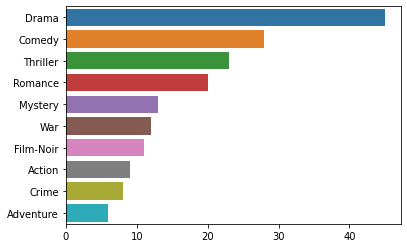

In [ ]:
f_genres_10 = f_genres.value_counts().head(10)

sns.barplot(x=f_genres_10.values, y=f_genres_10.index)
plt.show()

### 남성들의 별점 평균 상위 100위까지 영화들의 장르 순서.

In [ ]:
M_100 = by_gender_150.sort_values(by='M', ascending=False).head(100).index
M_100

Index(['Godfather, The (1972)',
       'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
       'Shawshank Redemption, The (1994)', 'Raiders of the Lost Ark (1981)',
       'Usual Suspects, The (1995)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Schindler's List (1993)',
       'Paths of Glory (1957)', 'Wrong Trousers, The (1993)',
       'Close Shave, A (1995)', 'Rear Window (1954)',
       'Double Indemnity (1944)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
       'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)', 'Casablanca (1942)',
       'Third Man, The (1949)', 'Lawrence of Arabia (1962)',
       'Godfather: Part II, The (1974)',
       'One Flew Over the Cuckoo's Nest (1975)', 'Maltese Falcon, The (1941)',
       'Great Escape, The (1963)', 'Citizen Kane (1941)', 'Yojimbo (1961)',
       'Bridge on the River Kwai, The (1957)', 'Saving Private Ryan (1998)',
       'North by Northwest (1959)',
       'Wallac

In [ ]:
M_movies = movies_with_index.loc[M_100]
M_movies.head()

,movie_id,genres
"Godfather, The (1972)",858,Action|Crime|Drama
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),2019,Action|Drama
"Shawshank Redemption, The (1994)",318,Drama
Raiders of the Lost Ark (1981),1198,Action|Adventure
"Usual Suspects, The (1995)",50,Crime|Thriller


In [ ]:
m_genres = []
for x in M_movies['genres'].str.split("|"):
    m_genres.extend(x)

m_genres = pd.Series(m_genres)
m_genres.value_counts()

Drama          51
Comedy         23
War            20
Thriller       19
Action         14
Crime          13
Film-Noir      13
Mystery         9
Adventure       8
Romance         7
Animation       6
Sci-Fi          5
Western         4
Horror          2
Fantasy         1
Documentary     1
Musical         1
Children's      1
dtype: int64

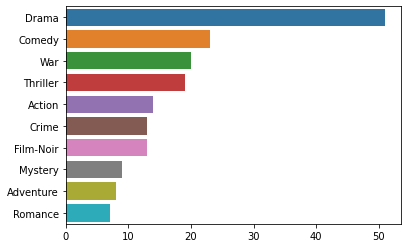

In [ ]:
m_genres_10 = m_genres.value_counts().head(10)

sns.barplot(x=m_genres_10.values, y=m_genres_10.index)
plt.show()

## 선호도의 차이가 큰 영화, 작은 영화

150회 이상의 리뷰가 있는 영화들 중 별점의 표준편차가 큰 상위 10개 제목

In [ ]:
# 영화 제목별 별점 표준편차
std_by_title = df.groupby('title')['rating'].std()
std_by_title

title
$1,000,000 Duck (1971)                        1.092563
'Night Mother (1986)                          1.118636
'Til There Was You (1997)                     1.020159
'burbs, The (1989)                            1.107760
...And Justice for All (1979)                 0.878110
                                                ...   
Zed & Two Noughts, A (1985)                   1.052794
Zero Effect (1998)                            1.042932
Zero Kelvin (Kjærlighetens kjøtere) (1995)    0.707107
Zeus and Roxanne (1997)                       1.122884
eXistenZ (1999)                               1.178568
Name: rating, Length: 3706, dtype: float64

In [ ]:
# 150회 이상의 리뷰가 있는 영화들만 선택
std_by_title_150 = std_by_title.loc[indexer]
std_by_title_150

American Beauty (1999)                                     0.975133
Star Wars: Episode IV - A New Hope (1977)                  0.800781
Star Wars: Episode V - The Empire Strikes Back (1980)      0.844432
Star Wars: Episode VI - Return of the Jedi (1983)          0.927356
Jurassic Park (1993)                                       0.969777
                                                             ...   
Tales from the Crypt Presents: Bordello of Blood (1996)    1.156267
Asphalt Jungle, The (1950)                                 0.833461
Love and Death on Long Island (1997)                       0.969604
Golden Voyage of Sinbad, The (1974)                        0.879996
Police Academy 5: Assignment: Miami Beach (1988)           1.006133
Name: rating, Length: 1683, dtype: float64

In [ ]:
# 150회 이상 리뷰가 있는 영화들 중 별점 표준편차가 큰 상위 10개
std_by_title_150.sort_values(ascending=False).head(10)

Plan 9 from Outer Space (1958)         1.455998
Texas Chainsaw Massacre, The (1974)    1.332448
Dumb & Dumber (1994)                   1.321333
Blair Witch Project, The (1999)        1.316368
Natural Born Killers (1994)            1.307198
Idle Hands (1999)                      1.298439
Pink Flamingos (1972)                  1.293937
Transformers: The Movie, The (1986)    1.292917
Very Bad Things (1998)                 1.280074
Tank Girl (1995)                       1.277695
Name: rating, dtype: float64

150회 이상의 리뷰가 있는 영화들 중 별점의 표준편차가 큰 상위 50개 영화 장르들

In [ ]:
# 표준편차가 큰 상위 50개 영화 제목
std_50 = std_by_title_150.sort_values(ascending=False).head(50).index
std_50

Index(['Plan 9 from Outer Space (1958)', 'Texas Chainsaw Massacre, The (1974)',
       'Dumb & Dumber (1994)', 'Blair Witch Project, The (1999)',
       'Natural Born Killers (1994)', 'Idle Hands (1999)',
       'Pink Flamingos (1972)', 'Transformers: The Movie, The (1986)',
       'Very Bad Things (1998)', 'Tank Girl (1995)',
       'Hellraiser: Bloodline (1996)', 'Eraserhead (1977)',
       'Rocky Horror Picture Show, The (1975)', 'Eyes Wide Shut (1999)',
       'Evita (1996)', 'Adventures of Rocky and Bullwinkle, The (2000)',
       'Dancer in the Dark (2000)', 'Billy Madison (1995)',
       'Fear and Loathing in Las Vegas (1998)', 'Bicentennial Man (1999)',
       'Twin Peaks: Fire Walk with Me (1992)', 'Hellraiser (1987)',
       'Babe: Pig in the City (1998)', 'Wes Craven's New Nightmare (1994)',
       'Superstar (1999)', 'In the Mouth of Madness (1995)',
       'Halloween: The Curse of Michael Myers (1995)',
       'South Park: Bigger, Longer and Uncut (1999)', 'Big Hit, The (1

In [ ]:
movies_std_50 = movies_with_index.loc[std_50]
movies_std_50.head()

,movie_id,genres
Plan 9 from Outer Space (1958),1924,Horror|Sci-Fi
"Texas Chainsaw Massacre, The (1974)",2459,Horror
Dumb & Dumber (1994),231,Comedy
"Blair Witch Project, The (1999)",2710,Horror
Natural Born Killers (1994),288,Action|Thriller


In [ ]:
genres = []
for x in movies_std_50['genres'].str.split("|"):
    genres.extend(x)

genres = pd.Series(genres)
genres.value_counts()

Comedy        25
Horror        17
Drama         14
Sci-Fi        10
Action        10
Thriller       6
Children's     4
Musical        4
Animation      3
War            3
Crime          2
Adventure      2
Mystery        1
Fantasy        1
dtype: int64

## 별점 평균이 4.0 이상인 영화들 중에서 자주 등장하는 영화 장르 상위 10개

In [ ]:
# 영화 제목별 별점 평균
by_title = df2.groupby('title')['rating'].mean()
by_title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
# 리뷰 150회 이상인 영화들의 별점 평균
result = by_title.loc[indexer]
result

American Beauty (1999)                                     4.317386
Star Wars: Episode IV - A New Hope (1977)                  4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)      4.292977
Star Wars: Episode VI - Return of the Jedi (1983)          4.022893
Jurassic Park (1993)                                       3.763847
                                                             ...   
Tales from the Crypt Presents: Bordello of Blood (1996)    2.589404
Asphalt Jungle, The (1950)                                 3.927152
Love and Death on Long Island (1997)                       3.430464
Golden Voyage of Sinbad, The (1974)                        3.397351
Police Academy 5: Assignment: Miami Beach (1988)           1.766667
Name: rating, Length: 1683, dtype: float64

In [ ]:
# 리뷰 150회 이상, 별점 평균 4.0 이상인 영화 제목들
title_over4 = result[result >= 4].index
title_over4

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Saving Private Ryan (1998)', 'Terminator 2: Judgment Day (1991)',
       'Matrix, The (1999)', 'Silence of the Lambs, The (1991)',
       'Raiders of the Lost Ark (1981)', 'Fargo (1996)',
       ...
       'Matewan (1987)', 'Shall We Dance? (1937)',
       'Once Upon a Time in the West (1969)', 'Suspicion (1941)',
       'Everest (1998)', 'Grand Illusion (Grande illusion, La) (1937)',
       'Seven Days in May (1964)', 'Sullivan's Travels (1942)',
       'Paradise Lost: The Child Murders at Robin Hood Hills (1996)',
       'Pawnbroker, The (1965)'],
      dtype='object', length=283)

In [ ]:
# 리뷰 150회 이상, 별점 평균 4.0 이상인 영화들의 DataFrame(아이디, 장르)
movies_over4 = movies_with_index.loc[title_over4]
movies_over4

,movie_id,genres
American Beauty (1999),2858,Comedy|Drama
Star Wars: Episode IV - A New Hope (1977),260,Action|Adventure|Fantasy|Sci-Fi
Star Wars: Episode V - The Empire Strikes Back (1980),1196,Action|Adventure|Drama|Sci-Fi|War
Star Wars: Episode VI - Return of the Jedi (1983),1210,Action|Adventure|Romance|Sci-Fi|War
Saving Private Ryan (1998),2028,Action|Drama|War
...,...,...
"Grand Illusion (Grande illusion, La) (1937)",3134,Drama|War
Seven Days in May (1964),3634,Thriller
Sullivan's Travels (1942),2936,Comedy
Paradise Lost: The Child Murders at Robin Hood Hills (1996),1361,Documentary


In [ ]:
genres = []
for x in movies_over4['genres'].str.split('|'):
    genres.extend(x)

genres = pd.Series(genres)
genres.value_counts().head(10)

Drama        134
Comedy        82
Thriller      51
Romance       38
War           36
Action        36
Crime         26
Mystery       21
Sci-Fi        19
Adventure     17
dtype: int64

## 성별 별점 평균이 4.0 이상인 영화들 중에서 자주 등장하는 영화 장르 상위 10개

### 여성 별점 평균이 4.0 이상인 영화들 중에서 자주 등장하는 영화 장르 상위 10개

In [ ]:
# 리뷰 150회 이상 영화들의 성별 별점 평균
result = by_gender.loc[indexer]
result

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
Tales from the Crypt Presents: Bordello of Blood (1996),2.727273,2.565891
"Asphalt Jungle, The (1950)",3.571429,4.008130
Love and Death on Long Island (1997),3.116279,3.555556
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818


In [ ]:
# 여성 리뷰 150회 이상 & 별점 평균 4.0 이상 영화 제목
movies_F_rating_4 = result[result['F'] >= 4.0].index
movies_F_rating_4

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Saving Private Ryan (1998)', 'Matrix, The (1999)',
       'Silence of the Lambs, The (1991)', 'Raiders of the Lost Ark (1981)',
       'Fargo (1996)', 'Sixth Sense, The (1999)', 'Braveheart (1995)',
       ...
       'Once Were Warriors (1994)', 'Suspicion (1941)', 'Everest (1998)',
       'Grand Illusion (Grande illusion, La) (1937)',
       'Seven Days in May (1964)', 'Sullivan's Travels (1942)',
       'Paradise Lost: The Child Murders at Robin Hood Hills (1996)',
       'Pawnbroker, The (1965)', 'Dead Man (1995)', 'Twelfth Night (1996)'],
      dtype='object', length=279)

In [ ]:
movies_F_over4 = movies_with_index.loc[movies_F_rating_4]

In [ ]:
genres_F = []
for x in movies_F_over4['genres'].str.split('|'):
    genres_F.extend(x)

genres_F = pd.Series(genres_F)
genres_F.value_counts().head(10)

Drama        145
Comedy        82
Romance       47
Thriller      40
War           32
Action        24
Mystery       22
Crime         21
Musical       17
Adventure     15
dtype: int64

### 남성 별점 평균이 4.0 이상인 영화들 중에서 자주 등장하는 영화 장르 상위 10개

In [ ]:
# 남성 리뷰 150회 이상 & 별점 평균 4.0 이상 영화 제목
movies_M_rating_4 = result[result['M'] >= 4.0].index
movies_M_rating_4

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Saving Private Ryan (1998)', 'Terminator 2: Judgment Day (1991)',
       'Matrix, The (1999)', 'Back to the Future (1985)',
       'Silence of the Lambs, The (1991)', 'Raiders of the Lost Ark (1981)',
       ...
       'Matewan (1987)', 'Shall We Dance? (1937)',
       'Once Upon a Time in the West (1969)', 'Everest (1998)',
       'Grand Illusion (Grande illusion, La) (1937)',
       'Seven Days in May (1964)', 'Sullivan's Travels (1942)',
       'Paradise Lost: The Child Murders at Robin Hood Hills (1996)',
       'Pawnbroker, The (1965)', 'Asphalt Jungle, The (1950)'],
      dtype='object', length=278)

In [ ]:
movies_M_over4 = movies_with_index.loc[movies_M_rating_4]

In [ ]:
genres_M = []
for x in movies_M_over4['genres'].str.split('|'):
    genres_M.extend(x)

genres_M = pd.Series(genres_M)
genres_M.value_counts().head(10)

Drama        131
Comedy        80
Thriller      49
Action        39
War           36
Romance       32
Crime         26
Sci-Fi        19
Mystery       19
Adventure     17
dtype: int64